In [6]:
import pandas as pd
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv("/MusaddiqueHussainLabs/ml_regression_taxi_fare_prediction/data/raw/taxi-fare-full.csv", encoding="utf-8")
df

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.80,CRD,17.5
1,CMT,1,1,474,1.50,CRD,8.0
2,CMT,1,1,637,1.40,CRD,8.5
3,CMT,1,1,181,0.60,CSH,4.5
4,CMT,1,1,661,1.10,CRD,8.5
...,...,...,...,...,...,...,...
199995,VTS,1,1,1320,1.91,CRD,14.5
199996,VTS,1,6,480,1.29,CRD,7.0
199997,CMT,1,1,952,1.70,CSH,11.0
199998,CMT,1,1,738,2.10,CSH,10.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vendor_id          200000 non-null  object 
 1   rate_code          200000 non-null  int64  
 2   passenger_count    200000 non-null  int64  
 3   trip_time_in_secs  200000 non-null  int64  
 4   trip_distance      200000 non-null  float64
 5   payment_type       200000 non-null  object 
 6   fare_amount        200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [5]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,fare_amount
count,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.03336,1.869280,681.769010,2.748261,11.639193
std,0.28021,1.550646,487.215898,3.233450,10.175079
min,0.00000,0.000000,0.000000,0.000000,2.500000
25%,1.00000,1.000000,360.000000,1.000000,6.500000
50%,1.00000,1.000000,554.000000,1.700000,9.000000
75%,1.00000,2.000000,885.000000,3.050000,13.000000
max,6.00000,6.000000,9771.000000,97.800000,470.000000


In [6]:
df.isnull().sum()

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

In [7]:
df.shape

(200000, 7)

In [8]:
df.columns

Index(['vendor_id', 'rate_code', 'passenger_count', 'trip_time_in_secs',
       'trip_distance', 'payment_type', 'fare_amount'],
      dtype='object')

In [10]:
df.nunique()

vendor_id               2
rate_code               7
passenger_count         7
trip_time_in_secs    2996
trip_distance        2309
payment_type            5
fare_amount           240
dtype: int64

In [12]:
df.duplicated().value_counts()

False    129529
True      70471
Name: count, dtype: int64

In [23]:
df['fare_amount']

0         17.5
1          8.0
2          8.5
3          4.5
4          8.5
          ... 
199995    14.5
199996     7.0
199997    11.0
199998    10.5
199999     7.0
Name: fare_amount, Length: 200000, dtype: float64

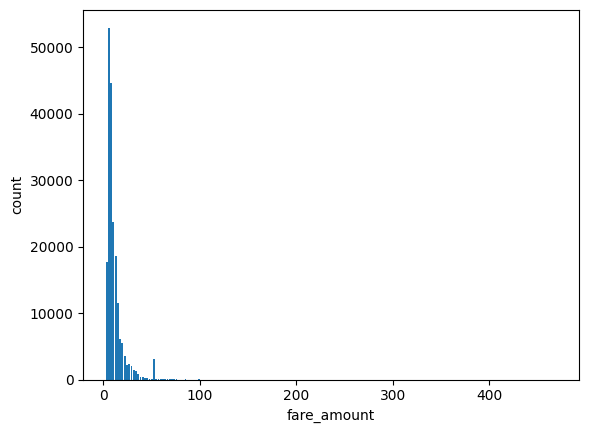

In [13]:
plt.hist(df['fare_amount'], bins=200, rwidth=0.8)
plt.xlabel('fare_amount')
plt.ylabel('count')
plt.show()

In [14]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,fare_amount
count,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.03336,1.869280,681.769010,2.748261,11.639193
std,0.28021,1.550646,487.215898,3.233450,10.175079
min,0.00000,0.000000,0.000000,0.000000,2.500000
25%,1.00000,1.000000,360.000000,1.000000,6.500000
50%,1.00000,1.000000,554.000000,1.700000,9.000000
75%,1.00000,2.000000,885.000000,3.050000,13.000000
max,6.00000,6.000000,9771.000000,97.800000,470.000000


In [26]:
upper_limit = df.fare_amount.mean() + 9 * df.fare_amount.std()
upper_limit

103.21490171864143

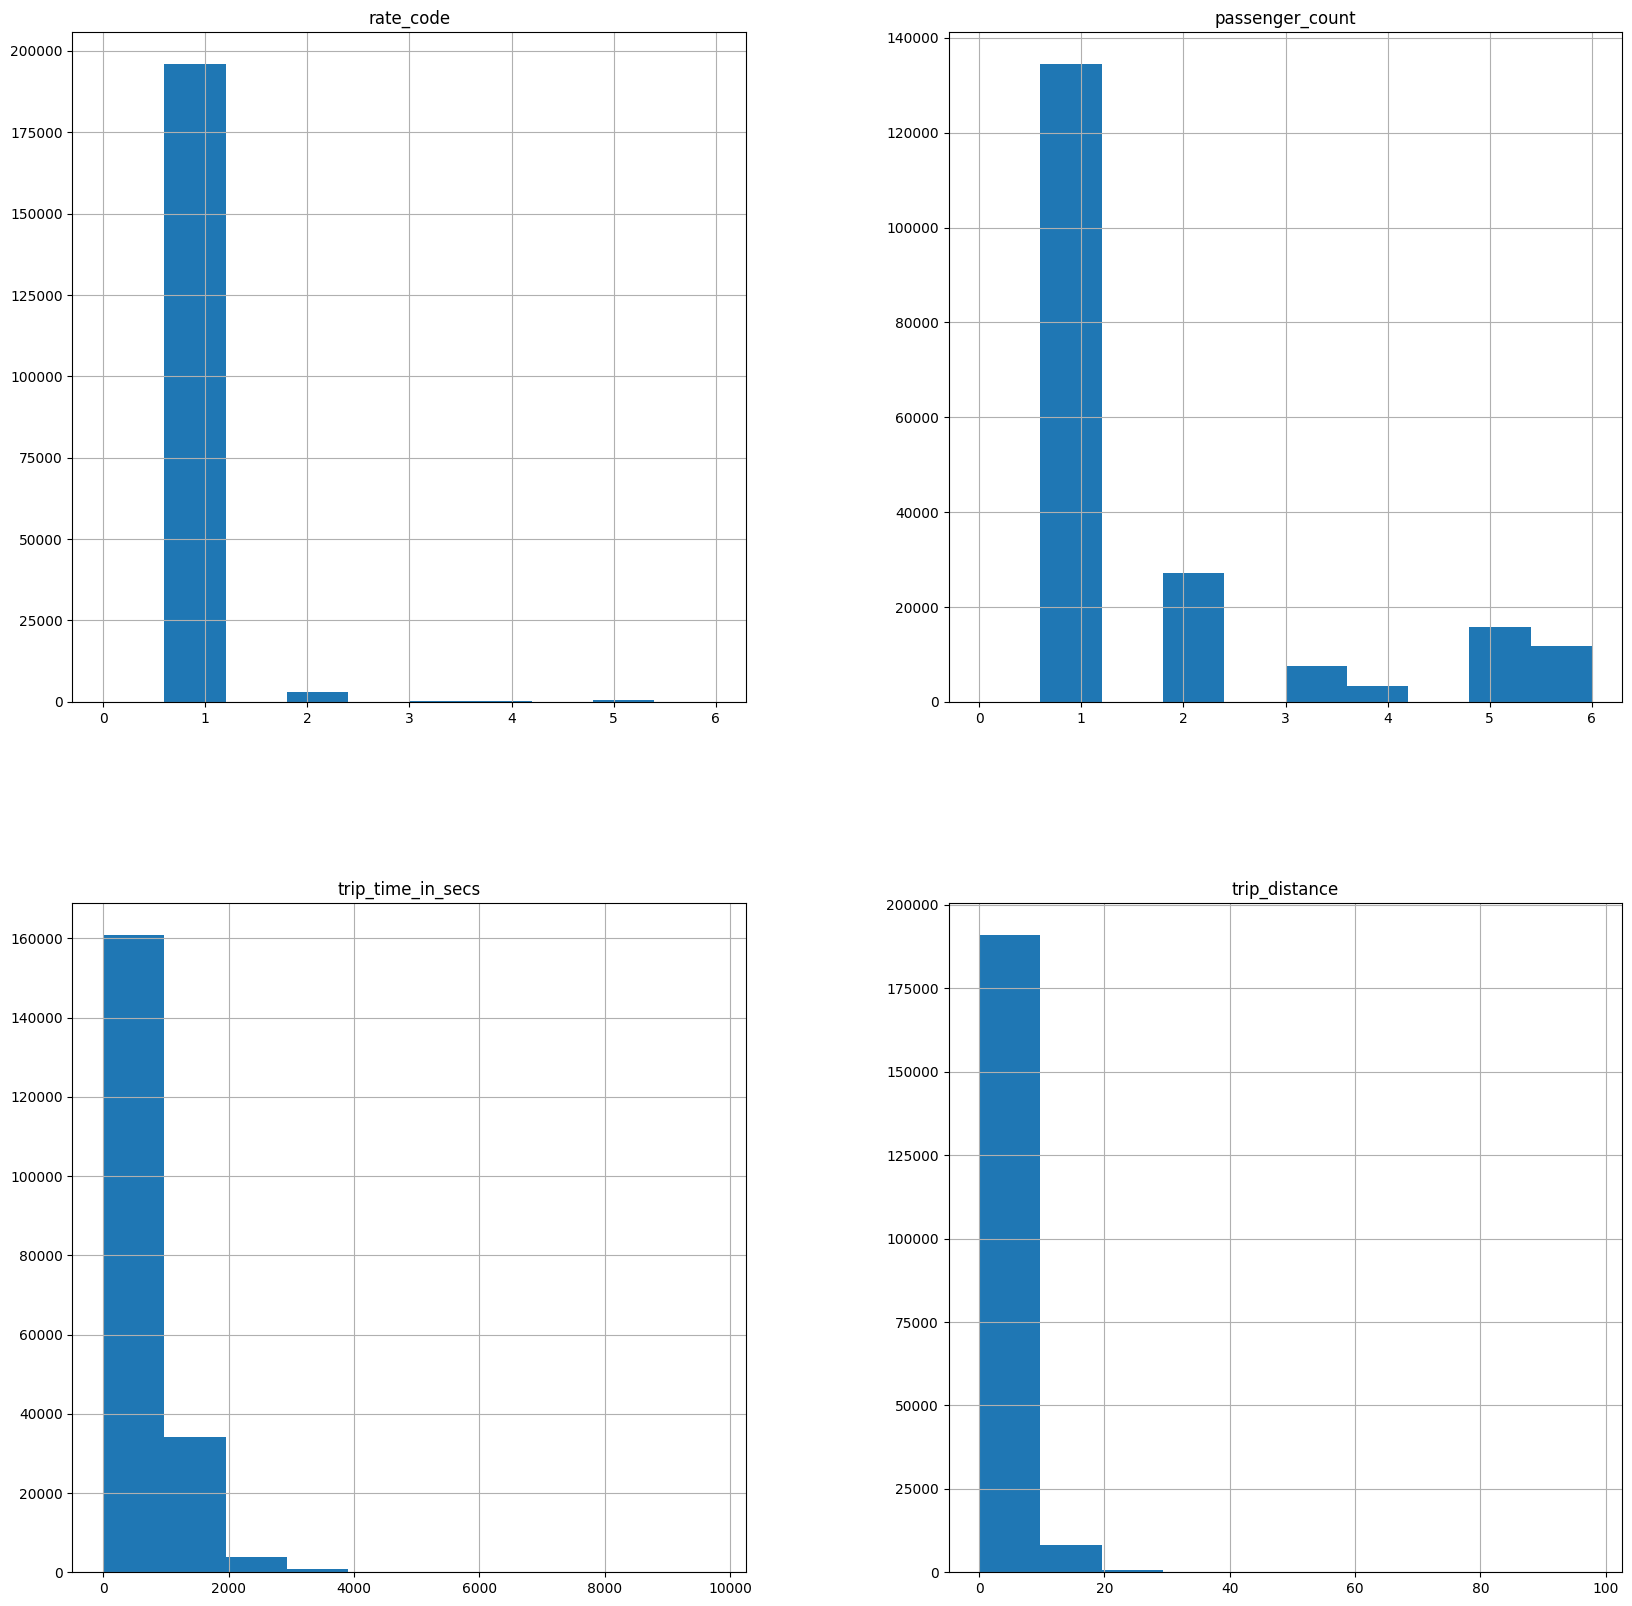

In [18]:

# This will select all the numeric columns
tbNumericDF=df.select_dtypes(include='number')

# Get the number of columns
numCols=tbNumericDF.shape[1]

#
fig, axisRows = plt.subplots(numCols//2, 2, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            tbNumericDF.hist(column = tbNumericDF.columns[i], bins = 10, ax=axis)
            i = i+1

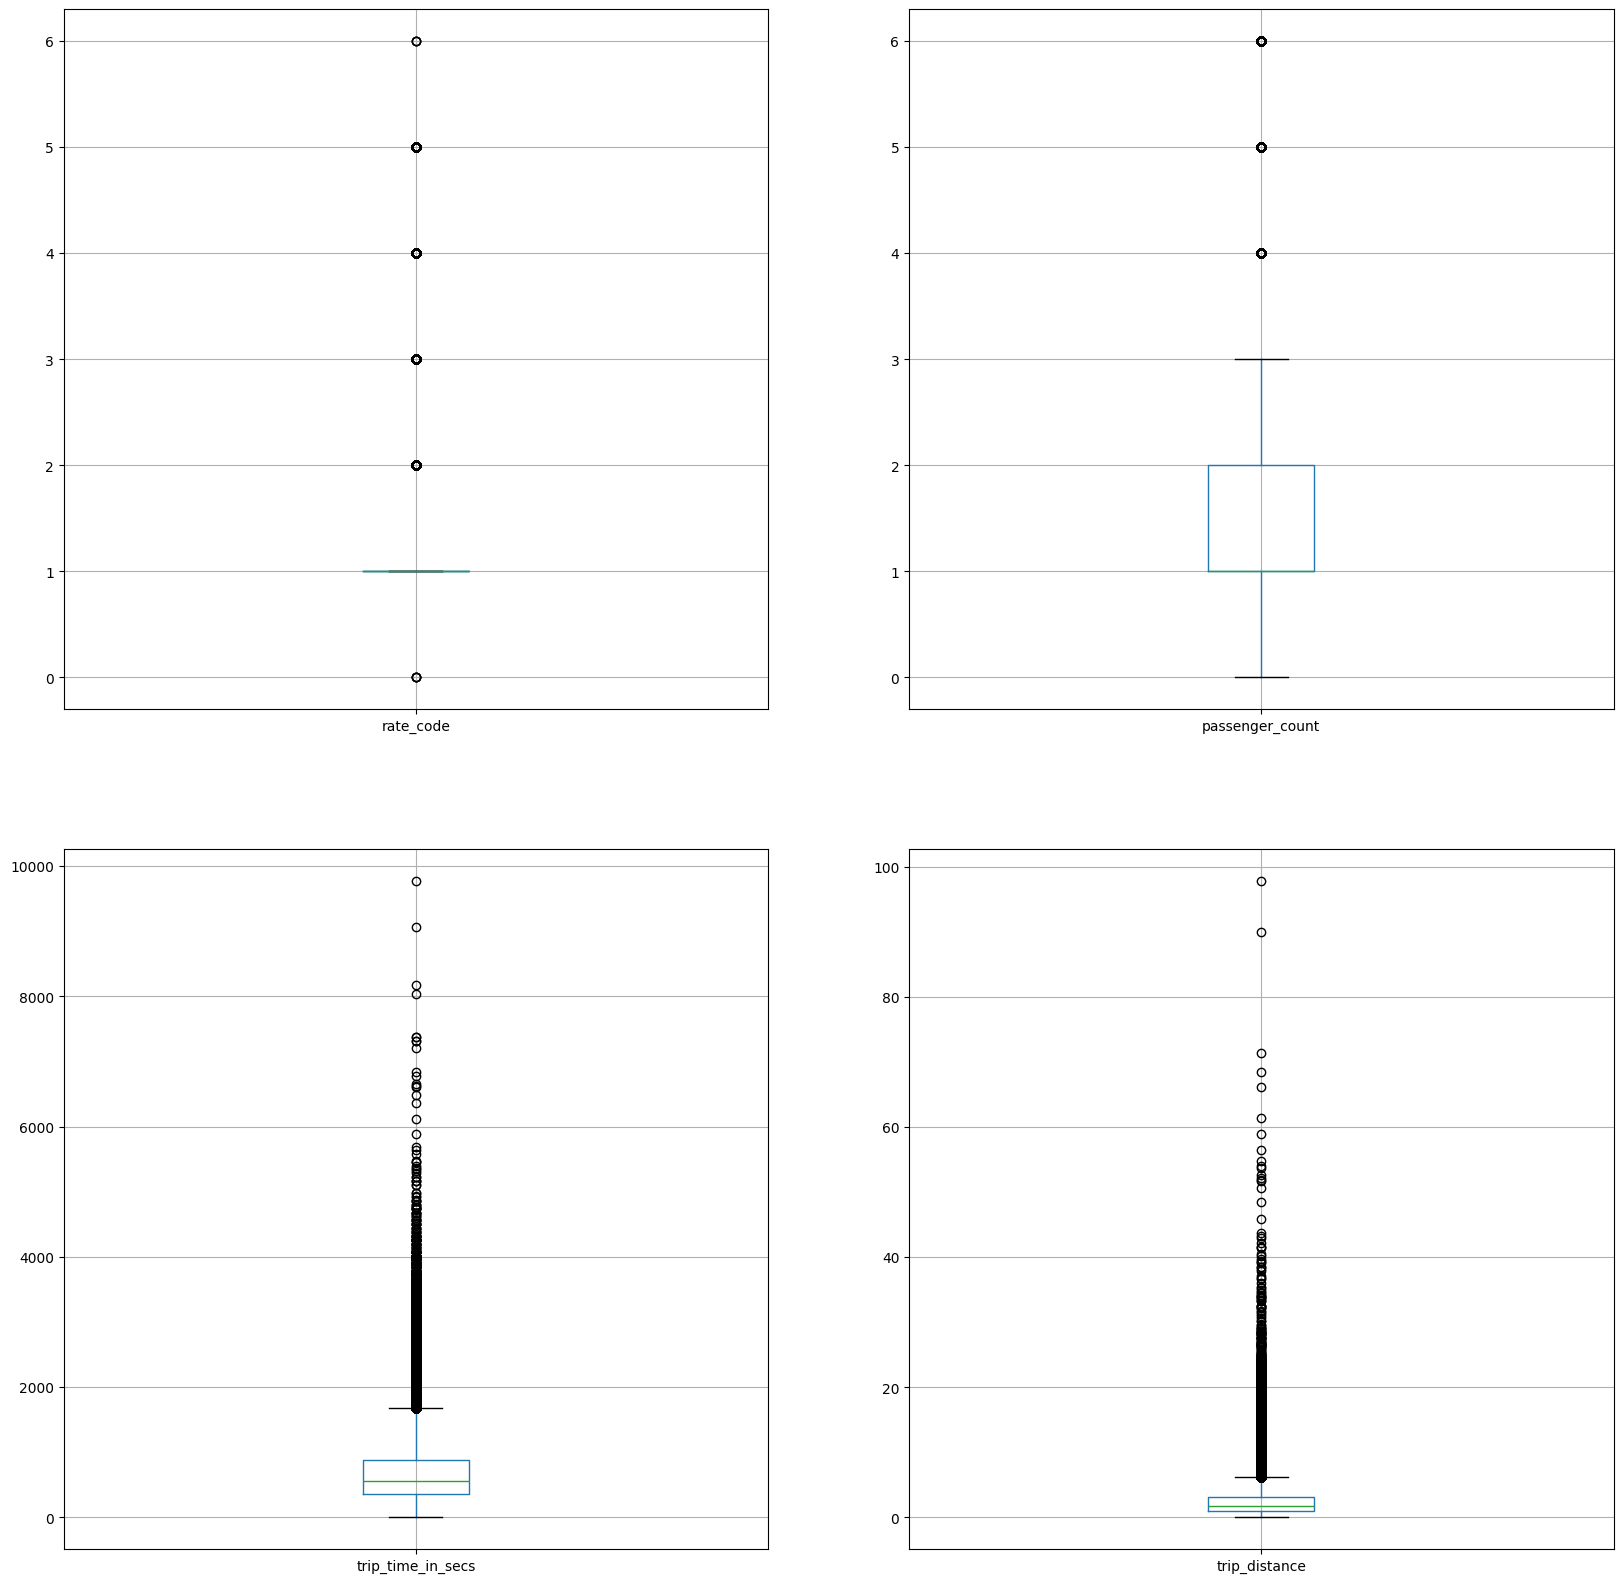

In [17]:
# This will select all the numeric columns
tbNumericDF=df.select_dtypes(include='number')

# Get the number of columns
numCols=tbNumericDF.shape[1]

#
fig, axisRows = plt.subplots(numCols//2, 2, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            tbNumericDF.boxplot(column = tbNumericDF.columns[i], ax=axis)
            i = i+1

Text(0, 0.5, 'Fare')

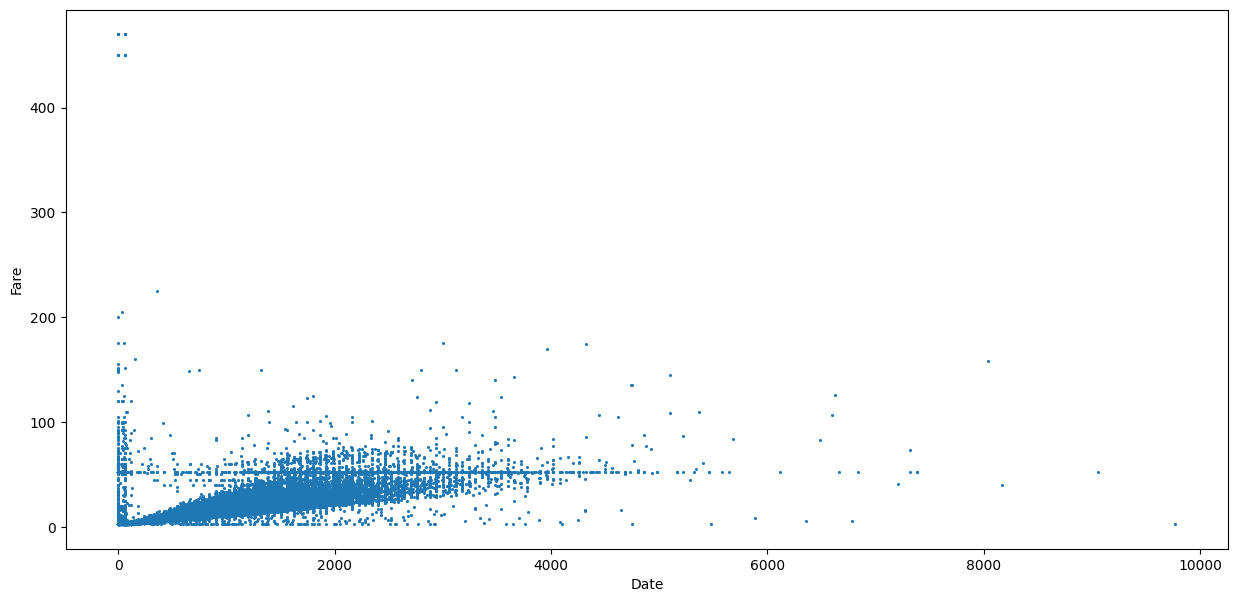

In [20]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['trip_time_in_secs'], y=df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

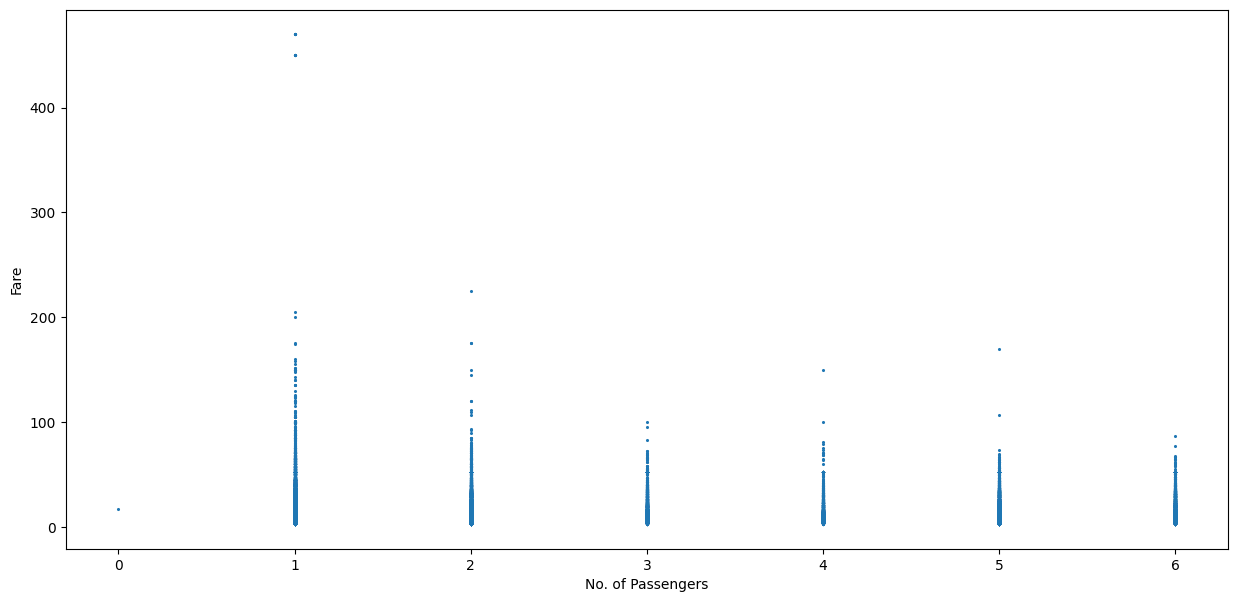

In [21]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

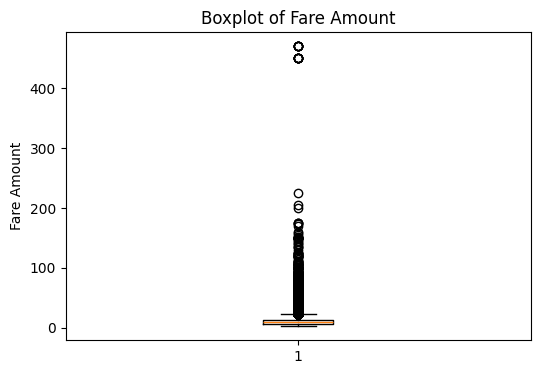

In [24]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.ylabel('Fare Amount')
plt.show()

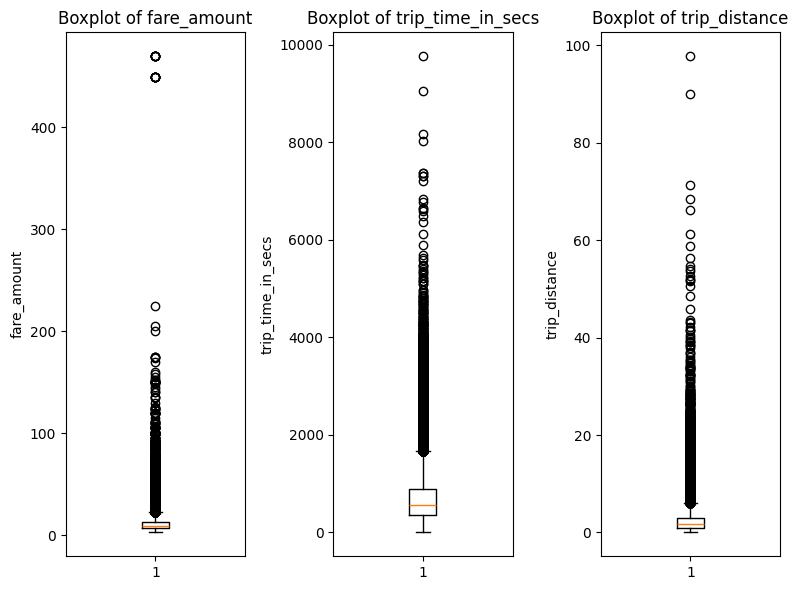

In [25]:
columns_to_check = ['fare_amount', 'trip_time_in_secs', 'trip_distance']

plt.figure(figsize=(8, 6))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [26]:
max_fare_amount = df['fare_amount'].max()
print(f"The maximum fare amount is: {max_fare_amount}")

The maximum fare amount is: 470.0


In [39]:
fare_greater_than_150 = df[df['fare_amount'] > 150]
print(fare_greater_than_150.count())

vendor_id            28
rate_code            28
passenger_count      28
trip_time_in_secs    28
trip_distance        28
payment_type         28
fare_amount          28
dtype: int64


In [40]:
fare_greater_than_150

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
25526,VTS,5,2,0,0.00,CSH,175.00
25721,VTS,5,2,360,0.02,CSH,225.00
47134,CMT,5,1,34,0.00,CRD,205.00
55682,VTS,5,1,3000,36.85,CRD,175.00
71892,VTS,5,1,4320,50.63,CRD,174.00
77997,VTS,5,1,0,0.00,CRD,200.00
97976,VTS,1,1,8040,51.72,CSH,158.50
106632,CMT,5,1,157,0.00,CRD,160.00
107075,CMT,5,2,47,0.00,CRD,175.00
145451,VTS,4,5,3960,32.45,CRD,169.50


In [44]:
fare_less_than_or_equalto_150 = df[(df['fare_amount'] <= 150) & (df['fare_amount'] >= 1)]
fare_less_than_or_equalto_150

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.80,CRD,17.5
1,CMT,1,1,474,1.50,CRD,8.0
2,CMT,1,1,637,1.40,CRD,8.5
3,CMT,1,1,181,0.60,CSH,4.5
4,CMT,1,1,661,1.10,CRD,8.5
...,...,...,...,...,...,...,...
199995,VTS,1,1,1320,1.91,CRD,14.5
199996,VTS,1,6,480,1.29,CRD,7.0
199997,CMT,1,1,952,1.70,CSH,11.0
199998,CMT,1,1,738,2.10,CSH,10.5


In [45]:
fare_less_than_or_equalto_150.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,fare_amount
count,199972.000000,199972.000000,199972.000000,199972.000000,199972.000000
mean,1.032830,1.869367,681.761867,2.747784,11.594983
std,0.276475,1.550710,486.771423,3.228326,9.313189
min,0.000000,0.000000,0.000000,0.000000,2.500000
25%,1.000000,1.000000,360.000000,1.000000,6.500000
50%,1.000000,1.000000,554.000000,1.700000,9.000000
75%,1.000000,2.000000,885.000000,3.050000,13.000000
max,6.000000,6.000000,9771.000000,97.800000,150.000000


In [46]:
fare_less_than_or_equalto_150.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199972 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vendor_id          199972 non-null  object 
 1   rate_code          199972 non-null  int64  
 2   passenger_count    199972 non-null  int64  
 3   trip_time_in_secs  199972 non-null  int64  
 4   trip_distance      199972 non-null  float64
 5   payment_type       199972 non-null  object 
 6   fare_amount        199972 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 12.2+ MB


In [47]:
from sklearn.preprocessing import StandardScaler

def normalize_mean_variance(data, columns_to_normalize):
    scaler = StandardScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    return data

# Other feature engineering functions as needed

# Feature engineering
columns_to_normalize = ['passenger_count', 'trip_time_in_secs', 'trip_distance']
data = normalize_mean_variance(fare_less_than_or_equalto_150, columns_to_normalize)
data

C:\Users\musad\AppData\Local\Temp\ipykernel_4296\1216817066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,-0.560626,1.210506,0.325933,CRD,17.5
1,CMT,1,-0.560626,-0.426817,-0.386512,CRD,8.0
2,CMT,1,-0.560626,-0.091957,-0.417488,CRD,8.5
3,CMT,1,-0.560626,-1.028744,-0.665295,CSH,4.5
4,CMT,1,-0.560626,-0.042652,-0.510416,CRD,8.5
...,...,...,...,...,...,...,...
199995,VTS,1,-0.560626,1.311169,-0.259511,CRD,14.5
199996,VTS,1,2.663711,-0.414491,-0.451561,CRD,7.0
199997,CMT,1,-0.560626,0.555166,-0.324560,CSH,11.0
199998,CMT,1,-0.560626,0.115533,-0.200657,CSH,10.5


In [48]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['vendor_id', 'rate_code', 'payment_type'], drop_first=True)
data

,passenger_count,trip_time_in_secs,trip_distance,fare_amount,vendor_id_VTS,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
0,-0.560626,1.210506,0.325933,17.5,False,True,False,False,False,False,False,False,False,False,False
1,-0.560626,-0.426817,-0.386512,8.0,False,True,False,False,False,False,False,False,False,False,False
2,-0.560626,-0.091957,-0.417488,8.5,False,True,False,False,False,False,False,False,False,False,False
3,-0.560626,-1.028744,-0.665295,4.5,False,True,False,False,False,False,False,True,False,False,False
4,-0.560626,-0.042652,-0.510416,8.5,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.560626,1.311169,-0.259511,14.5,True,True,False,False,False,False,False,False,False,False,False
199996,2.663711,-0.414491,-0.451561,7.0,True,True,False,False,False,False,False,False,False,False,False
199997,-0.560626,0.555166,-0.324560,11.0,False,True,False,False,False,False,False,True,False,False,False
199998,-0.560626,0.115533,-0.200657,10.5,False,True,False,False,False,False,False,True,False,False,False


In [48]:
from scipy.stats import zscore

columns_to_check = ['fare_amount']        
z_scores = zscore(df[columns_to_check])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(df[filtered_entries].count())
df[filtered_entries].describe()

vendor_id            195300
rate_code            195300
passenger_count      195300
trip_time_in_secs    195300
trip_distance        195300
payment_type         195300
fare_amount          195300
dtype: int64


,rate_code,passenger_count,trip_time_in_secs,trip_distance,fare_amount
count,195300.000000,195300.00000,195300.000000,195300.000000,195300.000000
mean,1.008208,1.87000,648.696283,2.437574,10.582717
std,0.168270,1.55334,415.180904,2.349709,6.504324
min,0.000000,0.00000,0.000000,0.000000,2.500000
25%,1.000000,1.00000,360.000000,1.000000,6.000000
50%,1.000000,1.00000,540.000000,1.700000,8.500000
75%,1.000000,2.00000,840.000000,2.900000,12.500000
max,6.000000,6.00000,9771.000000,97.800000,42.000000


In [49]:
df2 = df[filtered_entries]


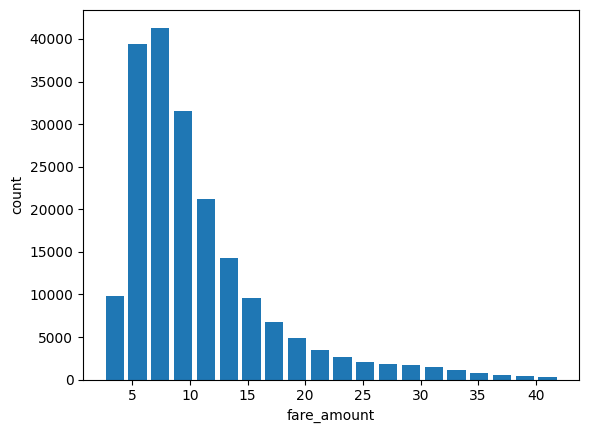

In [51]:
plt.hist(df2['fare_amount'], bins=20, rwidth=0.8)
plt.xlabel('fare_amount')
plt.ylabel('count')
plt.show()